<a href="https://colab.research.google.com/github/Antoha2024/DiplomProductStar/blob/main/DS47_1_diabetes_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- train test split 70/30, stratified
- Random state  - 654321
- Метрика - F1 Macro
- Метрики на train и test не должны сильно отличаться

Гипотеза: Уровень глюкозы в крови оказывает влияние на вероятность заболевания диабетом.
Гипотеза нулевая (H0): Нет разницы в среднем значении уровня глюкозы у пациентов с диабетом и без диабета.
Альтернативная гипотеза (HА​): Существует значительная разница в среднем уровне глюкозы у пациентов с диабетом и без диабета.
Методы проверки: t-тест, сравнение дисперсий.
- Работы команды:
https://colab.research.google.com/drive/1JbX1YjDkzM0qKy7I5EC4jHoqy75E5rAY?usp=sharing - Imbalanced-learn

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
uploaded = files.upload()
df = pd.read_excel('diabetes_ds.xlsx')
#Переименование таргета, удаление в нём пропусков
df = df.rename(columns={r'Сахарный диабет (ЕСТЬ\НЕТ)' : 'Сахарный диабет'})
df = df.dropna(subset = ['Сахарный диабет']).reset_index(drop=True)
display(df.head(3), df.shape)

Saving diabetes_ds.xlsx to diabetes_ds.xlsx


,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,...,ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК","ХСН по фракции выброса, %",Сахарный диабет
0,390.0,1.0,68.0,2.0,158.0,86.0,34.449607,5.33,163.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0,0,1.0
1,337.0,1.0,54.0,1.0,180.0,119.0,36.728395,5.01,130.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,35,1.0
2,160.0,1.0,68.0,1.0,174.0,110.0,36.332409,NaN,161.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,35,1.0


(478, 108)

In [3]:
df.info() #общая статистика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 108 entries, Номер to Сахарный диабет
dtypes: float64(101), object(7)
memory usage: 403.4+ KB


In [4]:
#Показать список столбцов полностью
pd.set_option('display.max_rows', None)
print(df.dtypes)

Номер                                                                    float64
Перенес/ не перенес КВИ                                                  float64
Возраст                                                                  float64
Пол                                                                      float64
Рост, см                                                                 float64
Вес, кг                                                                  float64
ИМТ 2 (ФОРМУЛА EXCEL)                                                    float64
Эритроциты                                                               float64
Гемоглобин                                                               float64
Цветовой показатель                                                      float64
Лейкоциты                                                                float64
Лимфоциты%                                                               float64
ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФО

In [5]:
#Столбцы которые содержат пробелы
has_space = df.applymap(lambda x: isinstance(x, str) and ' ' in x).any()
space_columns = has_space[has_space].index
print(space_columns)

Index(['Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса (комментарий)', 'ХБП (исходн)'],
      dtype='object')


In [6]:
#Столбцы с типом object
obj_columns = df.columns[df.dtypes == 'object']
print(obj_columns)

Index(['BPB голеней',
       'Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса', 'Блокада НП Гисса (комментарий)', 'AV- блокада',
       'ХБП (исходн)', 'ХСН по фракции выброса, %'],
      dtype='object')



Перекрестная таблица для признака: BPB голеней vs Сахарный диабет



Сахарный диабет,0.0,1.0
BPB голеней,,
0,177,209
1,39,36
2,4,3
3,2,3
4,1,1
2-3,0,2


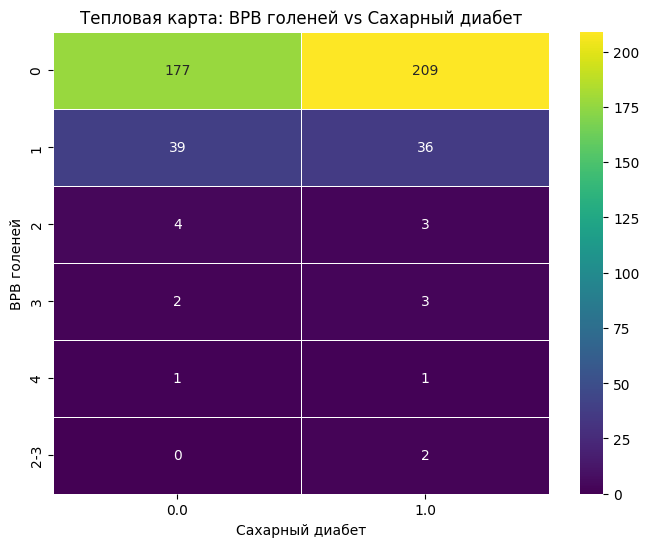


Перекрестная таблица для признака: Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий) vs Сахарный диабет



Сахарный диабет,0.0,1.0
Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий),,
незначительная,2,0
задней стенки левого желудочка,0,1
концентрическая гипертрофия,0,1
небольшая гипертрофия,1,0
незначительная,3,0
незначительная,4,4
незначительная гипертрофия ЗС ЛЖ,0,1
незначительная неравномерная,1,0
с изминением его миокарда,1,0


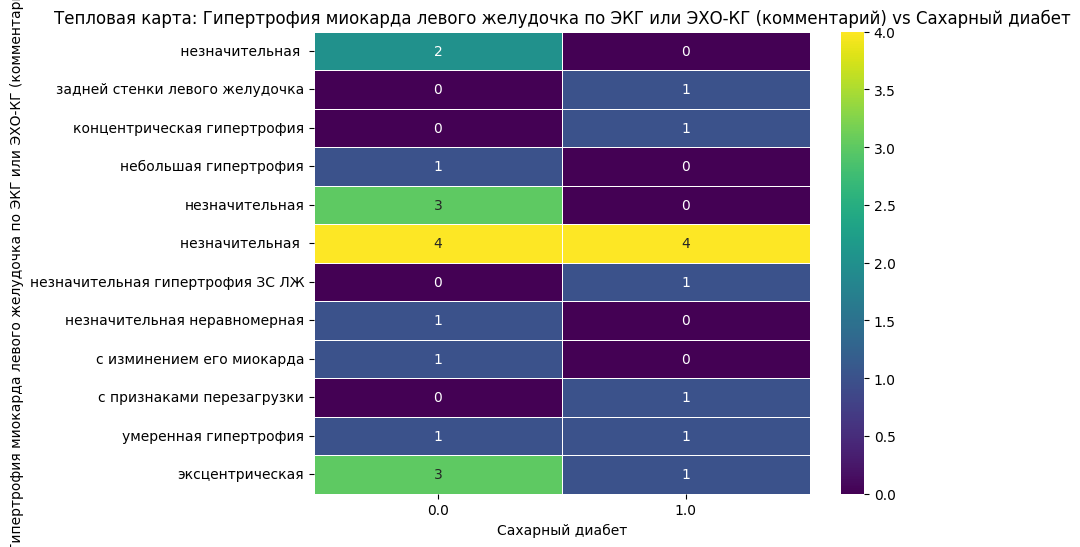


Перекрестная таблица для признака: Блокада НП Гисса vs Сахарный диабет



Сахарный диабет,0.0,1.0
Блокада НП Гисса,,
0,140,169
1,65,76
2,14,5
1-2,4,5


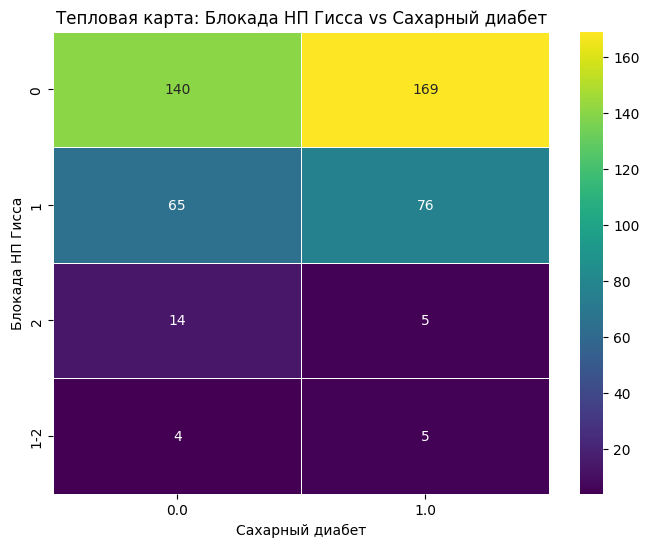


Перекрестная таблица для признака: Блокада НП Гисса (комментарий) vs Сахарный диабет



Сахарный диабет,0.0,1.0
Блокада НП Гисса (комментарий),,
1 и 2,1,1
1 с приемущественным блокос передней ветви,0,1
блокада ЛНПГ,0,1
блокада ПВЛНПГ,4,1
левой ножки,1,0
левой ножки,0,1
левой передней ветви,0,1
левых ветвей,1,0
неполная блокада,3,2


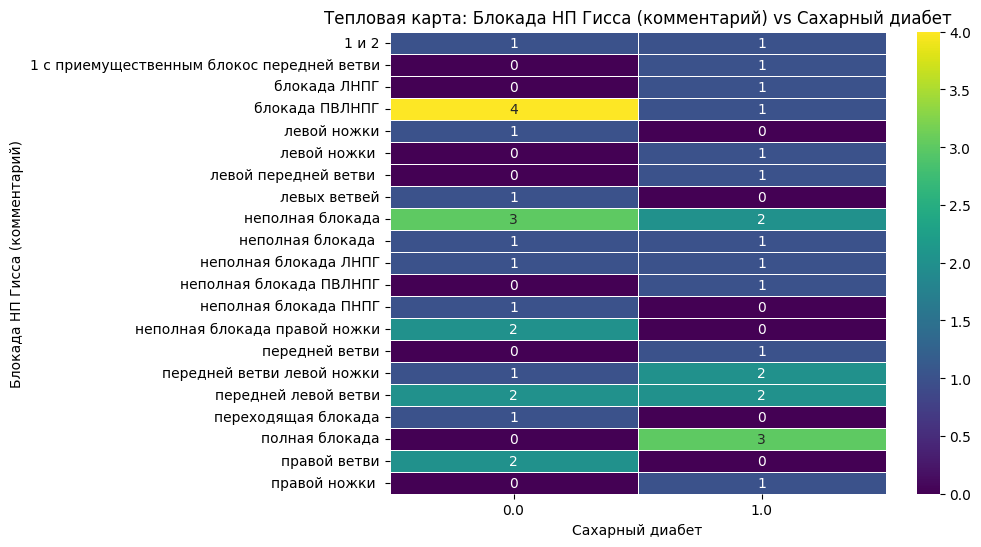


Перекрестная таблица для признака: AV- блокада vs Сахарный диабет



Сахарный диабет,0.0,1.0
AV- блокада,,
0,187,220
1,29,30
2,2,2
3,2,0
1-2,1,0
2-3,1,2
полная,1,1


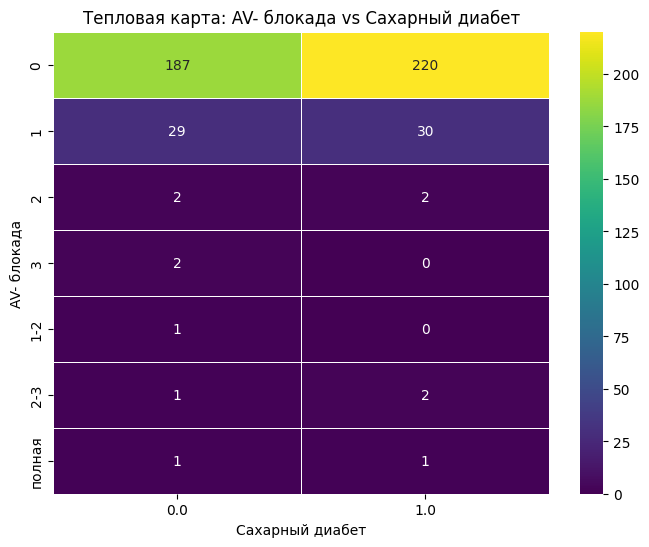


Перекрестная таблица для признака: ХБП (исходн) vs Сахарный диабет



Сахарный диабет,0.0,1.0
ХБП (исходн),,
0,165,155
2а,0,3
2са1,0,1
с1,8,9
с1 а3,0,1
с2,13,23
с2-с3,0,1
с3,7,21
с3а,20,25


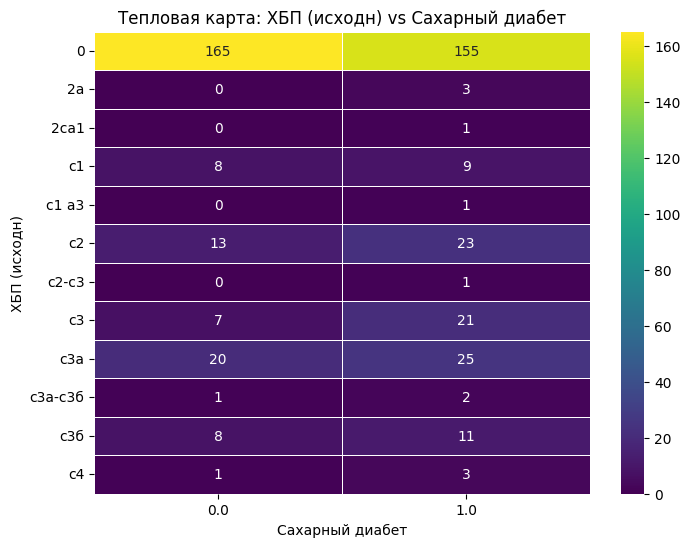


Перекрестная таблица для признака: ХСН по фракции выброса, % vs Сахарный диабет



Сахарный диабет,0.0,1.0
"ХСН по фракции выброса, %",,
0,42,56
17,0,1
18,2,1
20,1,5
21,3,1
22,1,3
23,4,3
24,4,2
25,4,5


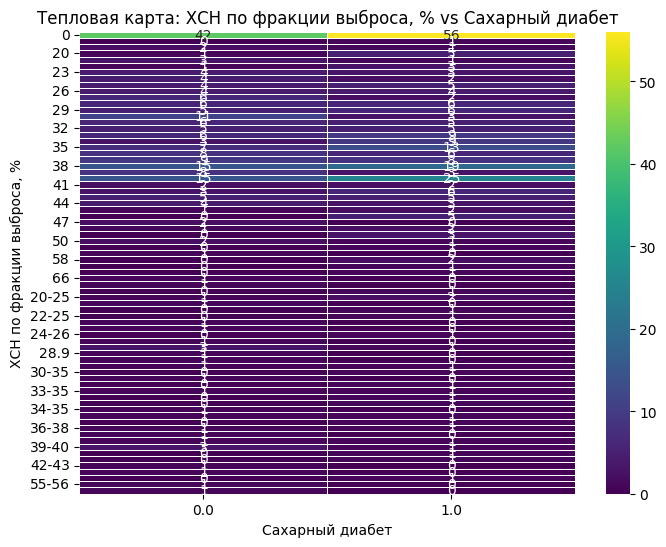

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Пройдем по каждому категориальному признаку и построим перекрестную таблицу с "Сахарным диабетом"
for col in obj_columns:
    # Формируем перекрестную таблицу
    matrix = pd.crosstab(df[col], df['Сахарный диабет'])

    # Выводим матрицу на экран
    print(f"\nПерекрестная таблица для признака: {col} vs Сахарный диабет\n")
    display(matrix)
    print("\n\n")

    # Тепловая карта
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d', linewidths=.5)
    plt.title(f"Тепловая карта: {col} vs Сахарный диабет")
    plt.xlabel('Сахарный диабет')
    plt.ylabel(col)
    plt.show()

Пустых значений: 0
Сахарный диабет
1.0    255
0.0    223
Name: count, dtype: int64


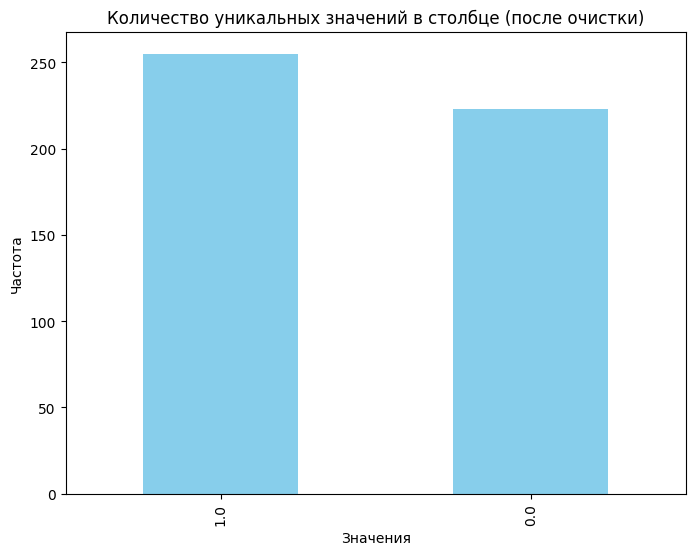

In [7]:
# Подсчет уникальных значений
value_counts = df['Сахарный диабет'].value_counts(dropna=False)

# Подсчет пустых значений
missing_count = df['Сахарный диабет'].isnull().sum()
print(f"Пустых значений: {missing_count}")

# Удаление строк с пустыми значениями
df_cleaned = df.dropna(subset=['Сахарный диабет'])

# Визуализация оставшихся данных
clean_value_counts = df_cleaned['Сахарный диабет'].value_counts()

# Печать очищенных данных
print(clean_value_counts)

# Построение графика
plt.figure(figsize=(8, 6))
clean_value_counts.plot(kind='bar', color='skyblue')
plt.title('Количество уникальных значений в столбце (после очистки)')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

Вывод: Оценивая представленную информацию, можно сказать, что в наборе данных наблюдается умеренный дисбаланс классов:

Класс 1.0 («есть сахарный диабет») присутствует в количестве 255 случаев.
Класс 0.0 («нет сахарного диабета») составляет 223 случая.
Соотношение классов составляет примерно:

$$\frac{223}{255} \approx 1.14$$

То есть класс 1.0 представлен немного чаще, но дисбаланс невелик. Такой уровень дисбаланса считается приемлемым и не требует специальных мер по восстановлению равновесия классов.